# TASK #1: UNDERSTAND THE PROBLEM AND BUSINESS CASE

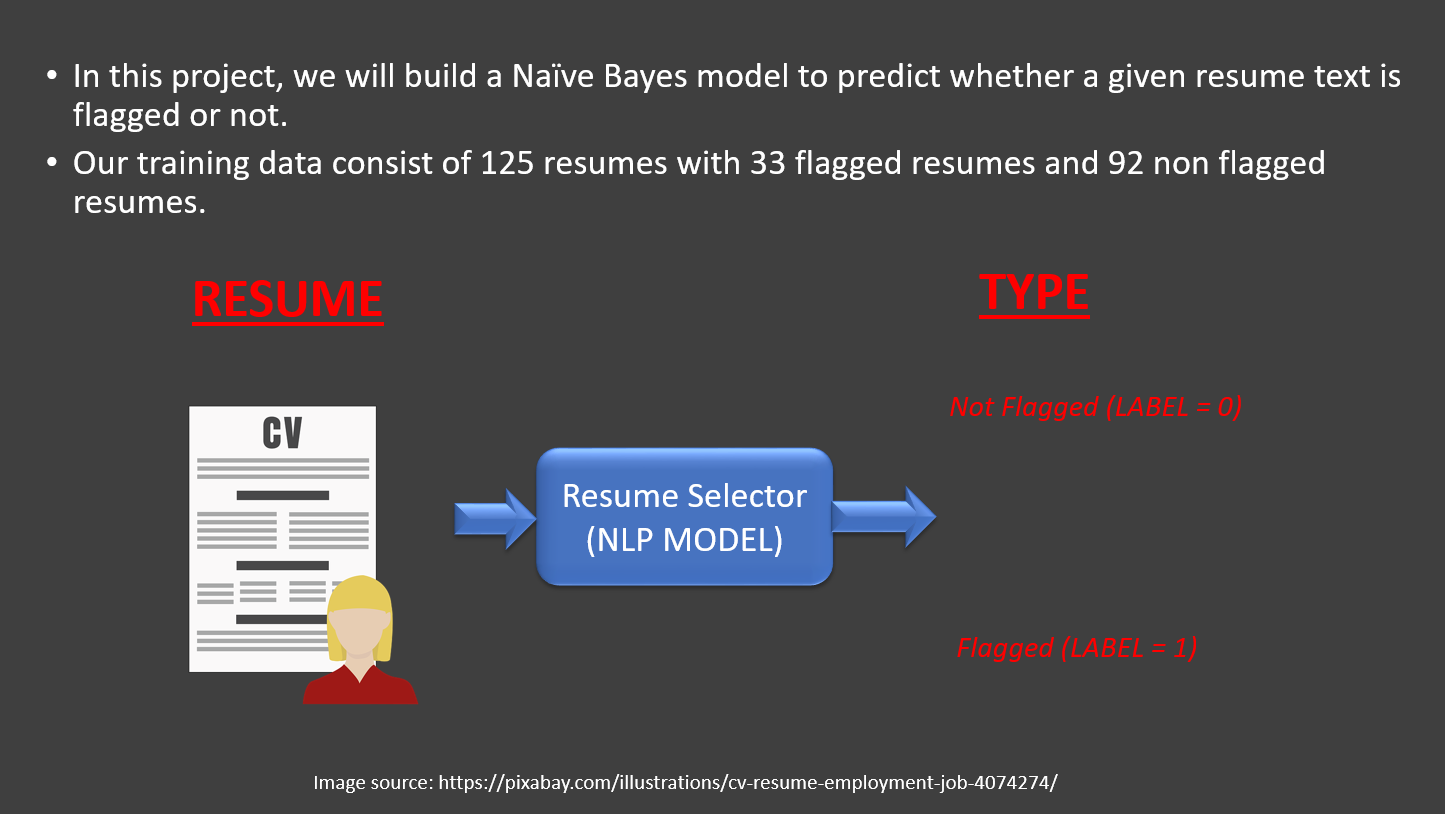

In [ ]:
# Data Source: https://www.kaggle.com/samdeeplearning/deepnlp

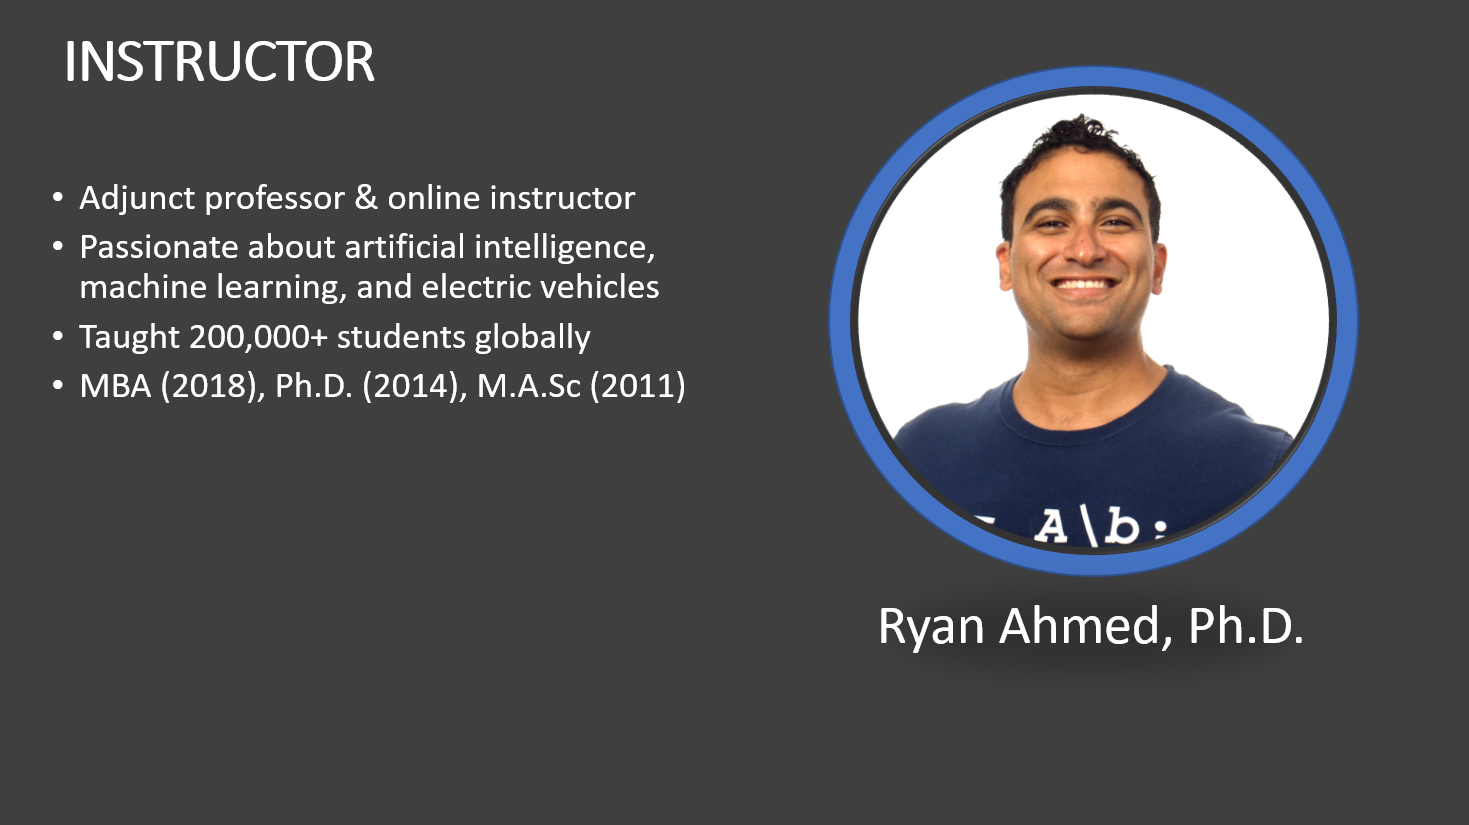

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [3]:
# load the data
resumes_df = pd.read_csv('resumes.csv', encoding='latin1')

In [4]:
resumes_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [5]:
# data containing resume
resumes_df[['resume_text', 'class']]

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


MINI CHALLENGE #1: 
- Print the first and last elements in the dataframe. 

In [6]:
resumes_df.head(3)

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...


In [7]:
resumes_df.tail(3)

,resume_id,class,resume_text
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...
124,resume_125,not_flagged,\rResearch and Development Scientist - Burling...


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [8]:
# obtain dataframe information
resumes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_id    125 non-null    object
 1   class        125 non-null    object
 2   resume_text  125 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


In [9]:
# check for null values
resumes_df.isnull().sum()

resume_id      0
class          0
resume_text    0
dtype: int64

In [10]:
# check for null values
resumes_df.isna().sum()

resume_id      0
class          0
resume_text    0
dtype: int64

In [11]:
resumes_df['class'].value_counts()

class
not_flagged    92
flagged        33
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
resumes_df['class'] = labelencoder.fit_transform(resumes_df['class'].values)

MINI CHALLENGE #2:
- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

In [13]:
resumes_df['class'].value_counts()

class
1    92
0    33
Name: count, dtype: int64

In [14]:
class_0_df = resumes_df[resumes_df['class'] == 0]
class_1_df = resumes_df[resumes_df['class'] == 1]
print("Class 0: Data -> {}".format(class_0_df.shape))
print("Class 1: Data -> {}".format(class_1_df.shape))

Class 0: Data -> (33, 3)
Class 1: Data -> (92, 3)


# TASK #4: PERFORM DATA CLEANING

In [15]:
resumes_df['resume_text'] = resumes_df['resume_text'].apply(lambda x: x.replace('\r', ''))
resumes_df

,resume_id,class,resume_text
0,resume_1,1,Customer Service Supervisor/Tier - Isabella Ca...
1,resume_2,1,Engineer / Scientist - IBM Microelectronics Di...
2,resume_3,1,LTS Software Engineer Computational Lithograph...
3,resume_4,1,TUTORWilliston VT - Email me on Indeed: indee...
4,resume_5,0,Independent Consultant - Self-employedBurlingt...
...,...,...,...
120,resume_121,1,Brattleboro VT - Email me on Indeed: indeed.co...
121,resume_122,1,Research and Teaching Assistant - University o...
122,resume_123,1,Medical Coder - Highly Skilled - Entry LevelSu...
123,resume_124,0,Waterbury VT - Email me on Indeed: indeed.com/...


In [16]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\miguelestradam36\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miguelestradam36\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'email'])

In [19]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [20]:
# Cleaned text
resumes_df['cleaned'] = resumes_df['resume_text'].apply(preprocess)

In [22]:
resumes_df

,resume_id,class,resume_text,cleaned
0,resume_1,1,Customer Service Supervisor/Tier - Isabella Ca...,customer service supervisor tier isabella cata...
1,resume_2,1,Engineer / Scientist - IBM Microelectronics Di...,engineer scientist ibm com albert gregoritsch ...
2,resume_3,1,LTS Software Engineer Computational Lithograph...,lts software engineer computational lithograph...
3,resume_4,1,TUTORWilliston VT - Email me on Indeed: indee...,tutorwilliston com alec schwartz awork college...
4,resume_5,0,Independent Consultant - Self-employedBurlingt...,independent consultant self com alex reutter f...
...,...,...,...,...
120,resume_121,1,Brattleboro VT - Email me on Indeed: indeed.co...,brattleboro com bcc skilled presenter trainer ...
121,resume_122,1,Research and Teaching Assistant - University o...,research teaching assistant university com cdd...
122,resume_123,1,Medical Coder - Highly Skilled - Entry LevelSu...,medical coder highly skilled entry levelsudbur...
123,resume_124,0,Waterbury VT - Email me on Indeed: indeed.com/...,waterbury com bec fcwilling relocate work empl...


In [23]:
print(resumes_df['cleaned'][0])

customer service supervisor tier isabella catalog companysouth burlington com aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research 

In [24]:
print(resumes_df['resume_text'][0])

Customer Service Supervisor/Tier - Isabella Catalog CompanySouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26WORK EXPERIENCECustomer Service Supervisor/TierIsabella Catalog Company - Shelburne VT - August 2015 to Present2 Customer Service/Visual Set Up & Display/Website Maintenance¢ Supervise customer service team of a popular catalog company¢ Manage day to day issues and resolution of customer upset to ensure customer satisfaction¢ Troubleshoot order and shipping issues: lost in transit order errors damages¢ Manage and resolve escalated customer calls to ensure customer satisfaction¢ Assist customers with order placing cross-selling/upselling of catalog merchandise¢ Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ¢ Website clean-up: adding images type up product information proofreadingAdministrative Assistant /Events Coordinator/Office Services AssistantEileen Fisher Inc - Irvington NY - 

# TASK #5: VISUALIZE CLEANED DATASET

<Axes: xlabel='class', ylabel='count'>

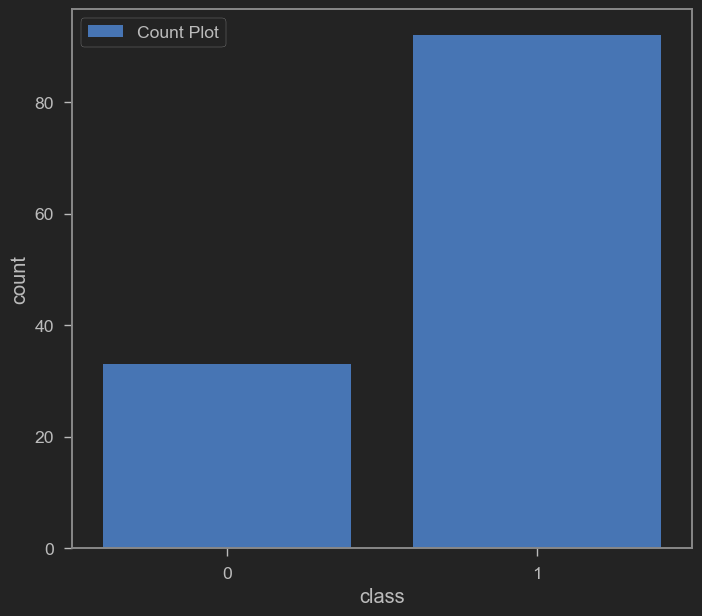

In [25]:
# Plot the counts of flagged vs not flagged
sns.countplot(data=resumes_df, x='class', label='Count Plot')

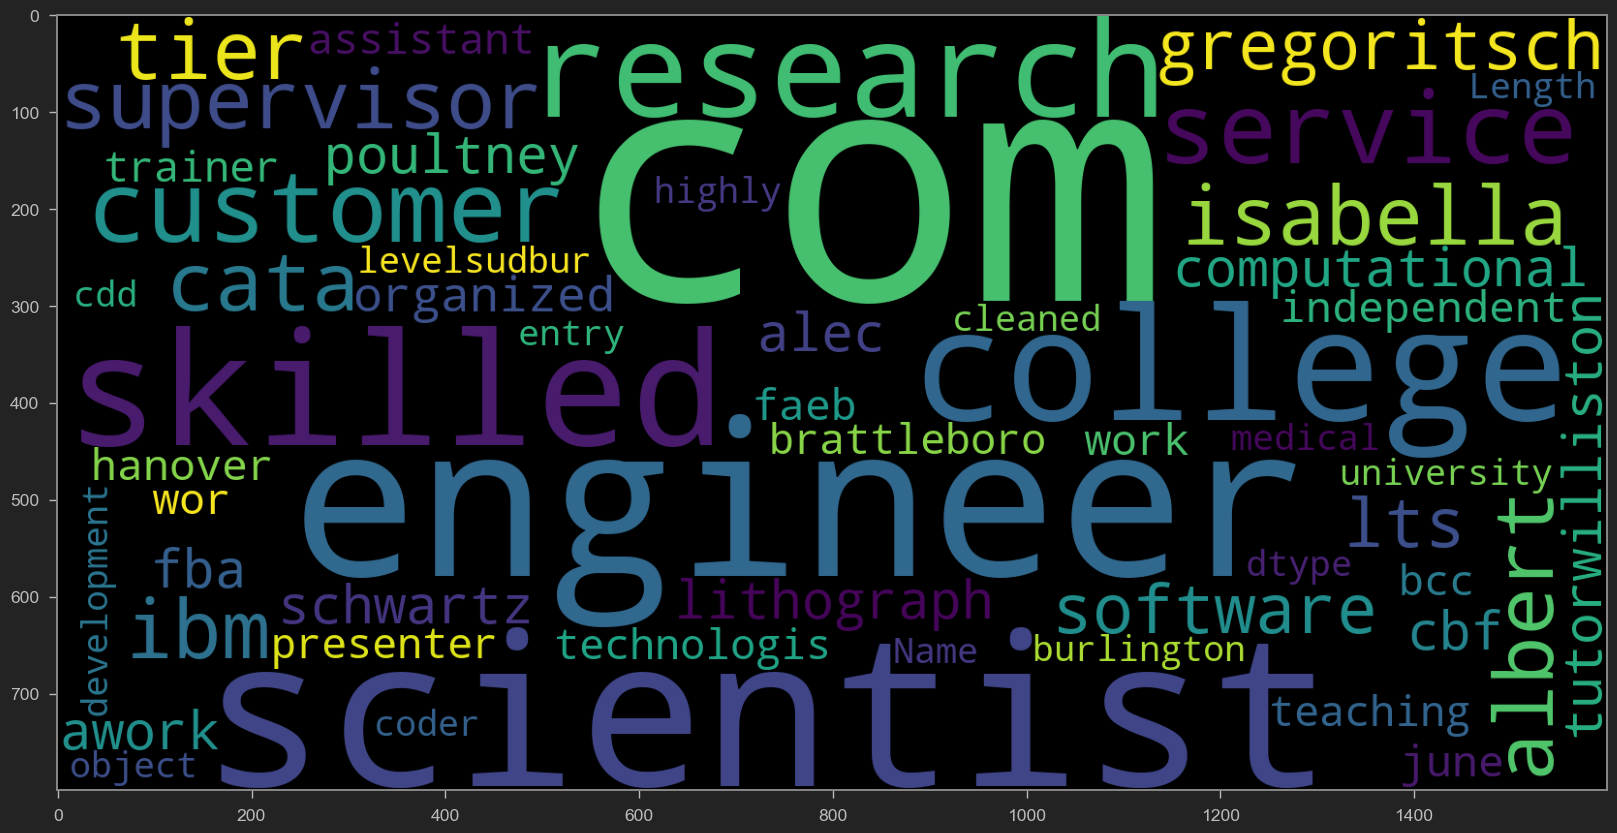

In [26]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words=200, width=1600, height=800, stopwords=stop_words).generate(str(resumes_df[resumes_df['class'] == 1].cleaned))
plt.imshow(wc)

# TASK #6: PREPARE THE DATA BY APPLYING COUNT VECTORIZER

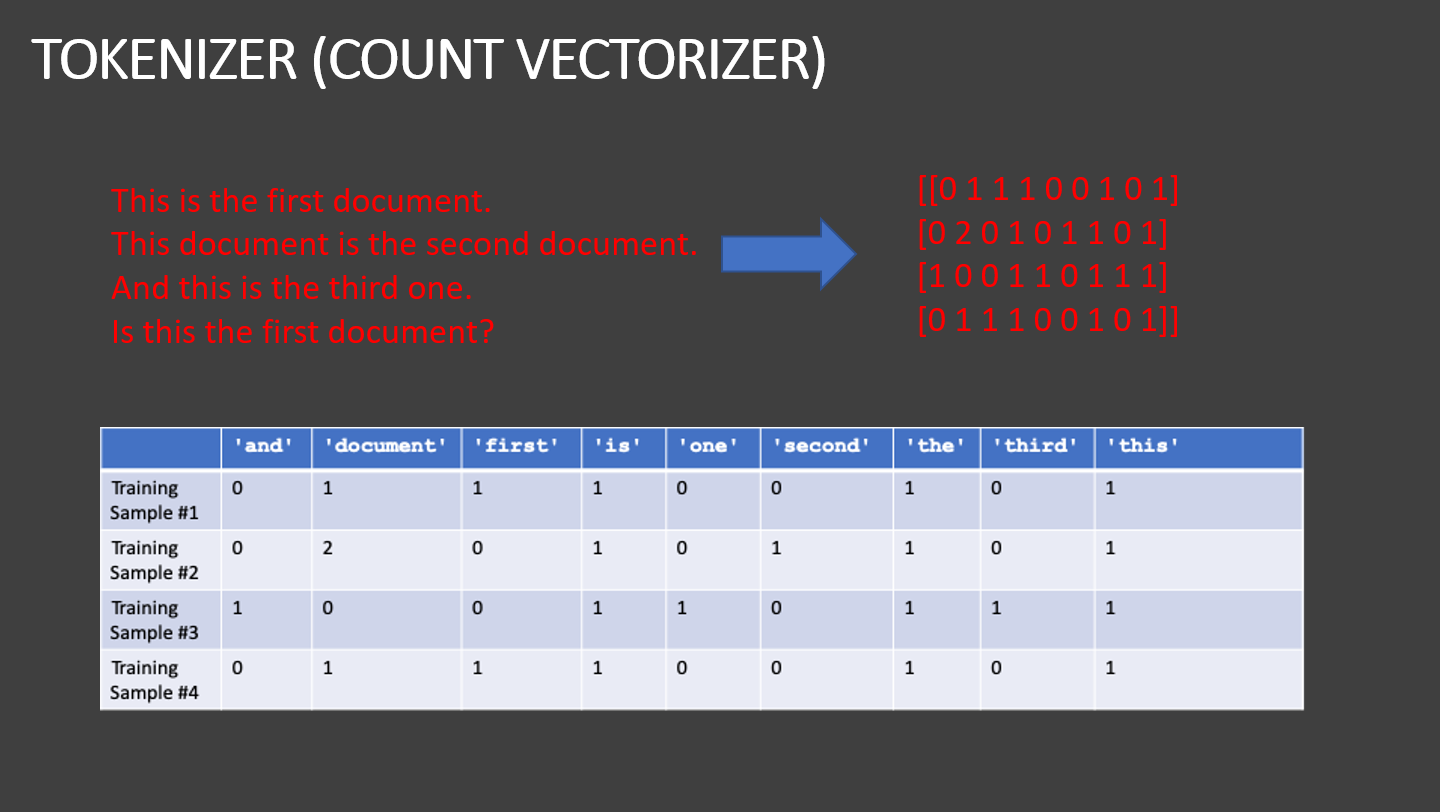

In [27]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [29]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [30]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [31]:
# Applying CountVectorier to the cleaned text
vectorizer = CountVectorizer()
count_vectorizer = vectorizer.fit_transform(resumes_df['cleaned'])

In [32]:
print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [33]:
print(count_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS - PART #1

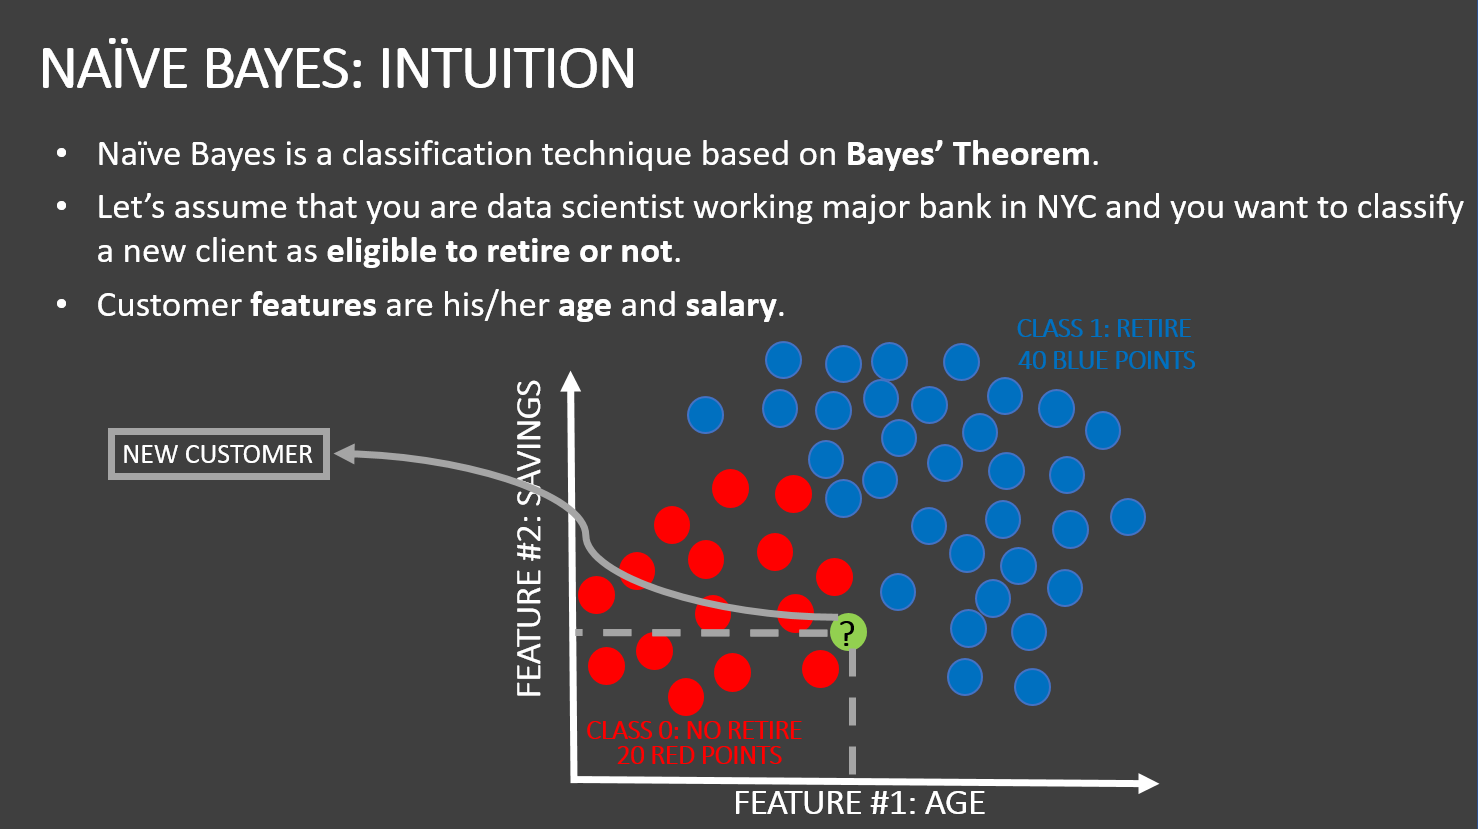

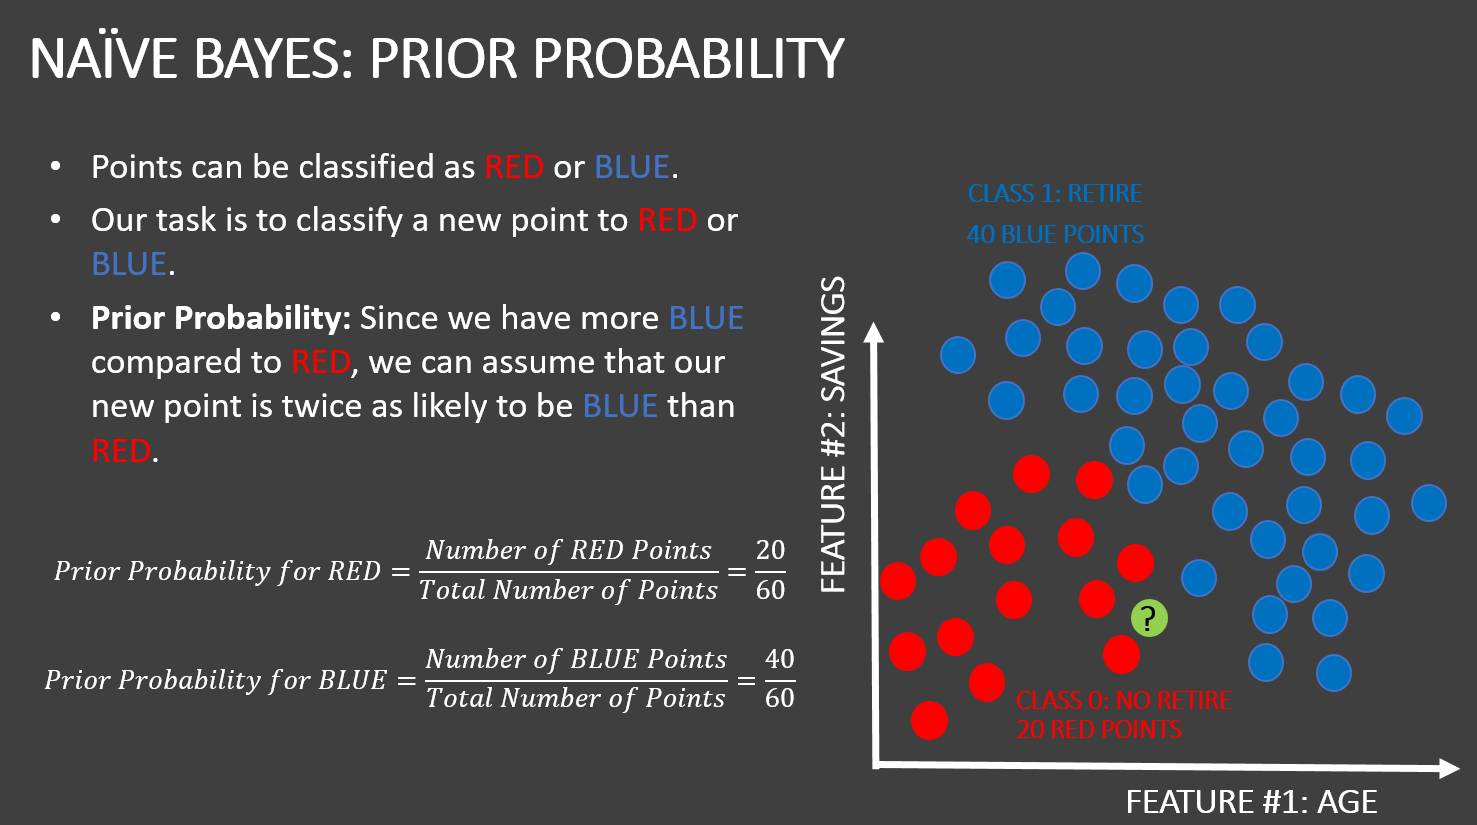

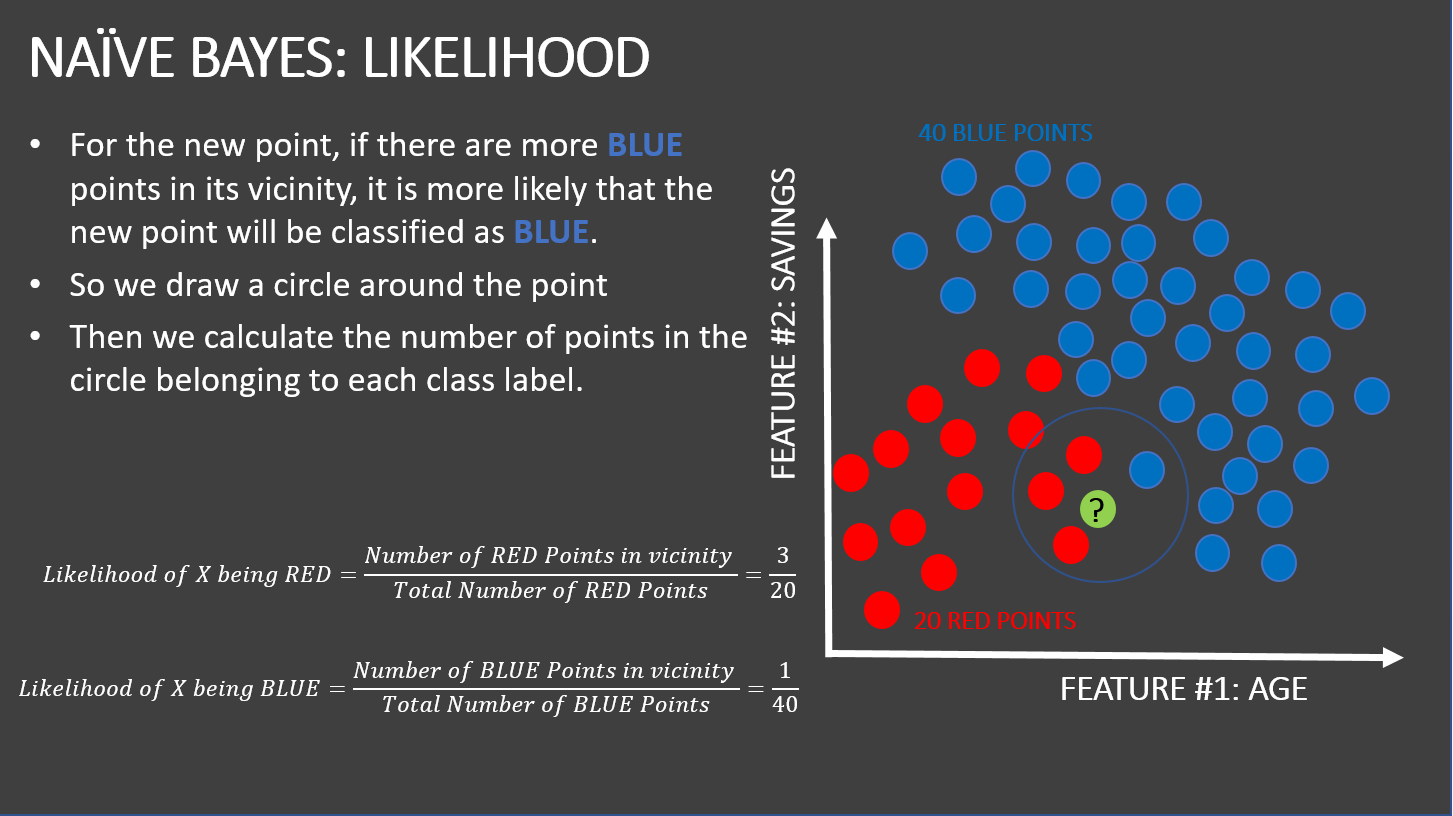

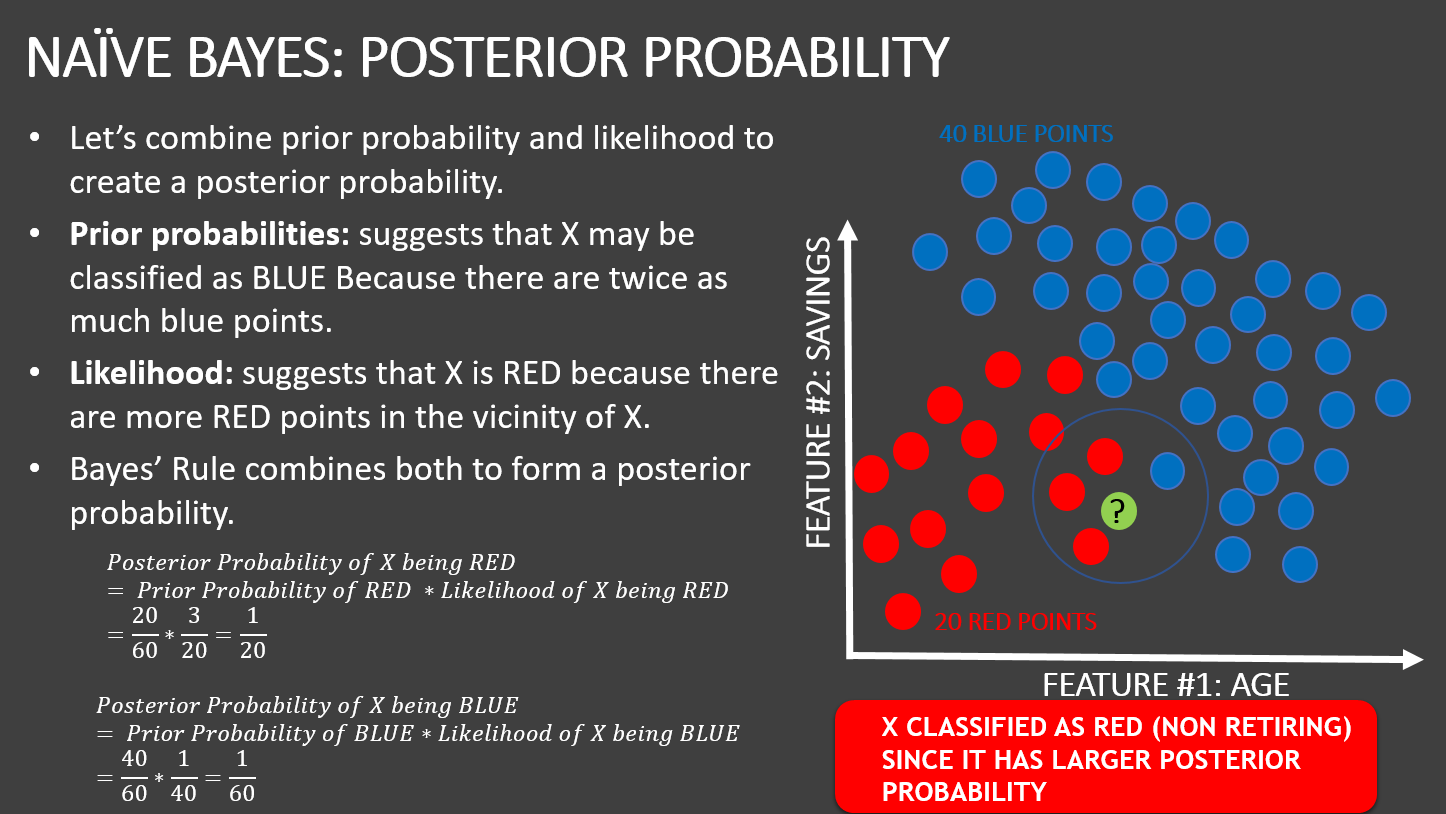

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS - PART #2

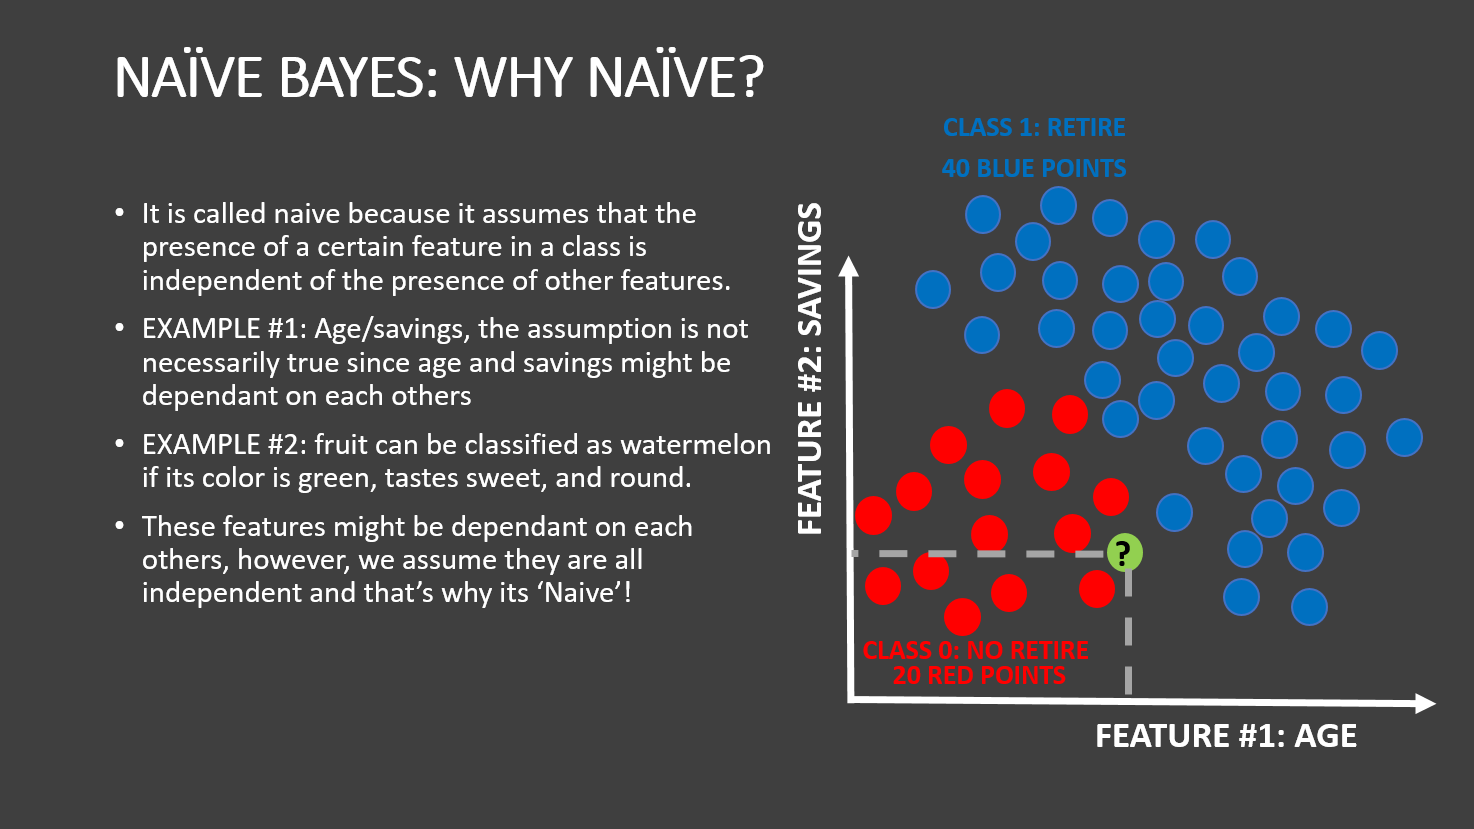

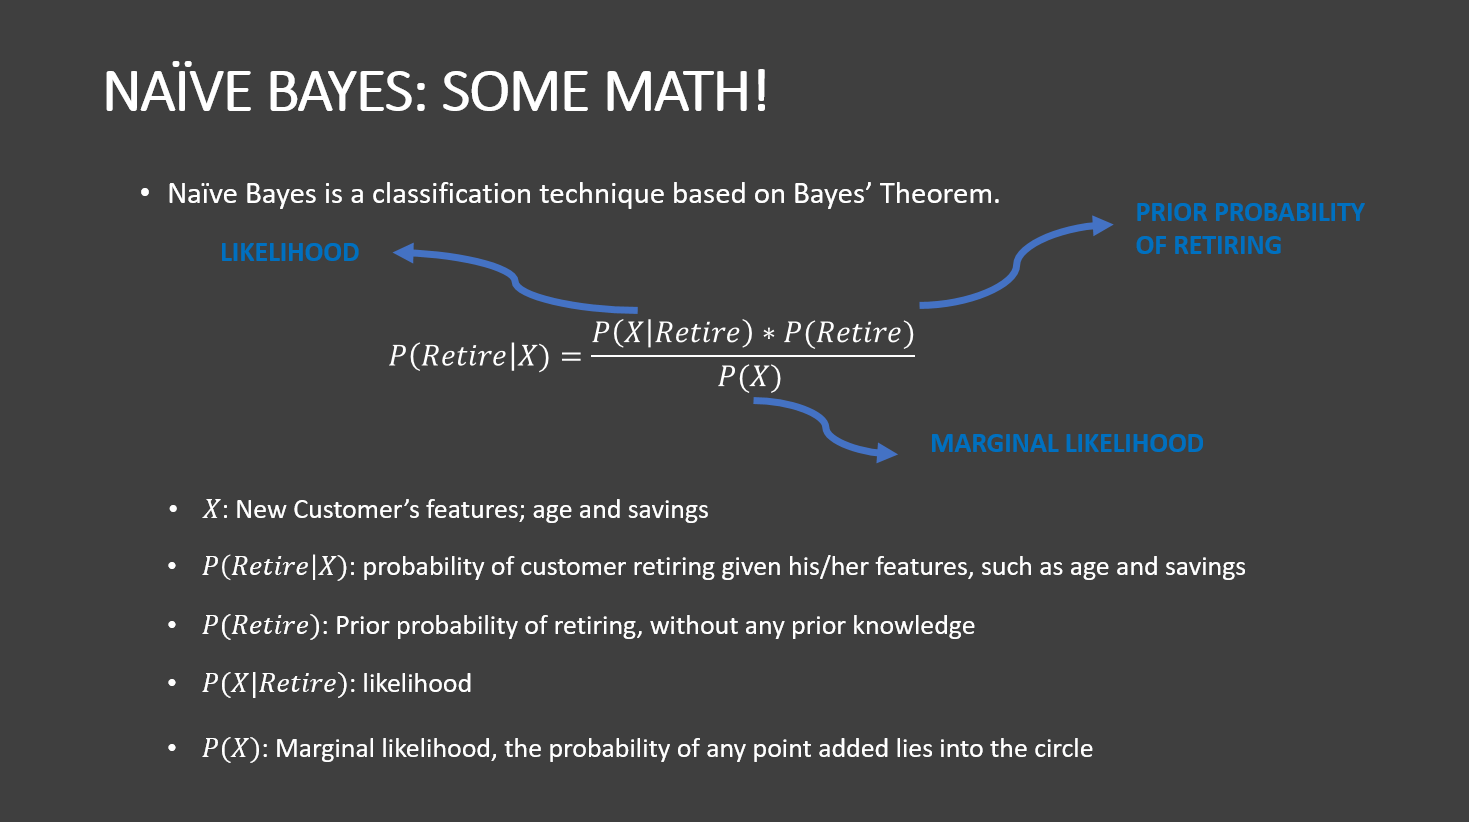

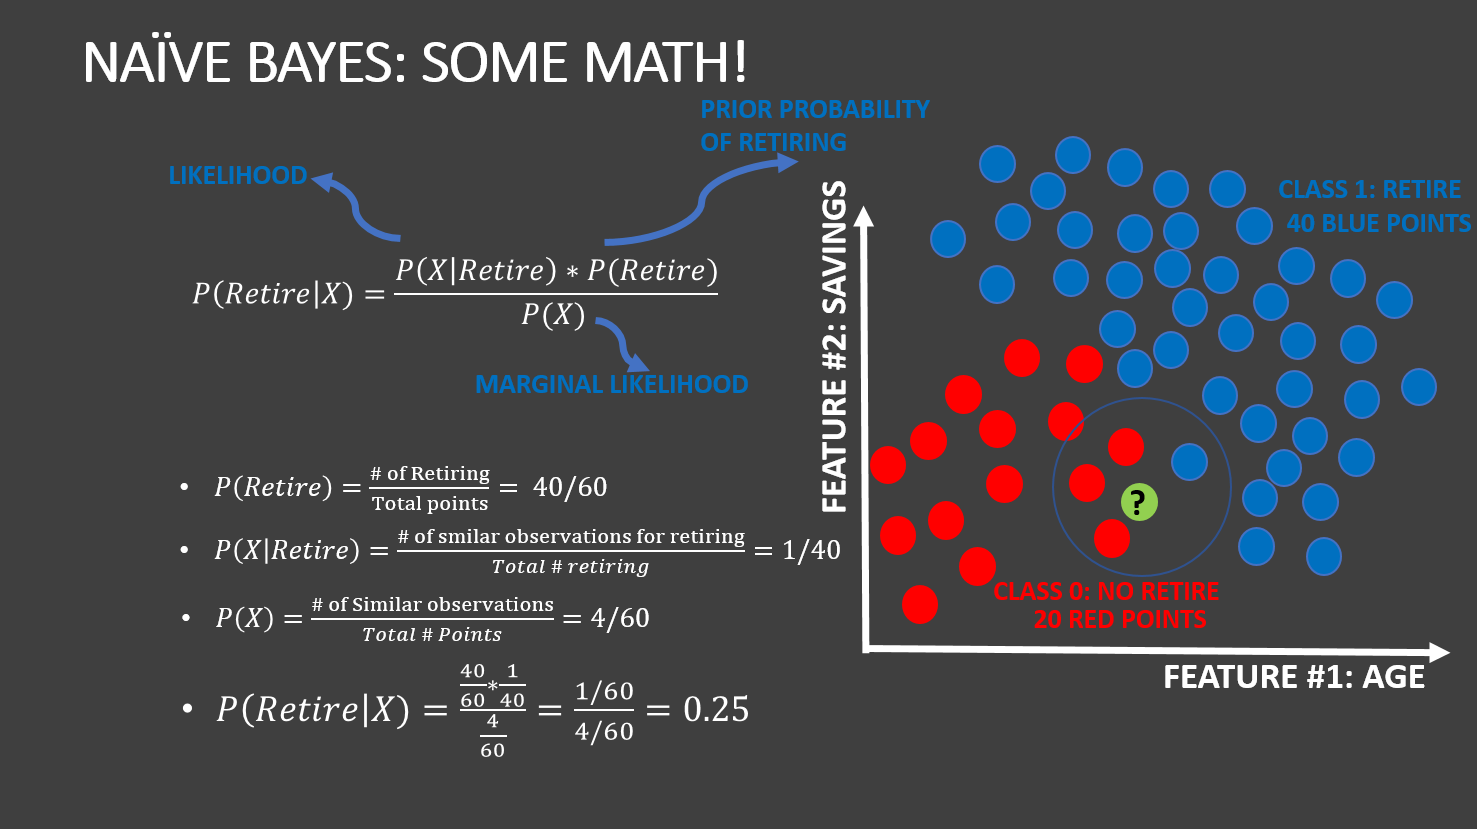

# TASK#9: TRAIN NAIVE BAYES CLASSIFIER MODEL

In [34]:
X = count_vectorizer

In [35]:
y = resumes_df['class']

In [36]:
X.shape

(125, 11315)

In [37]:
y.shape

(125,)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

NB_classifier.fit(x_train_smote, y_train_smote)


MultinomialNB()

# TASK #10: ASSESS TRAINED MODEL PERFORMANCE


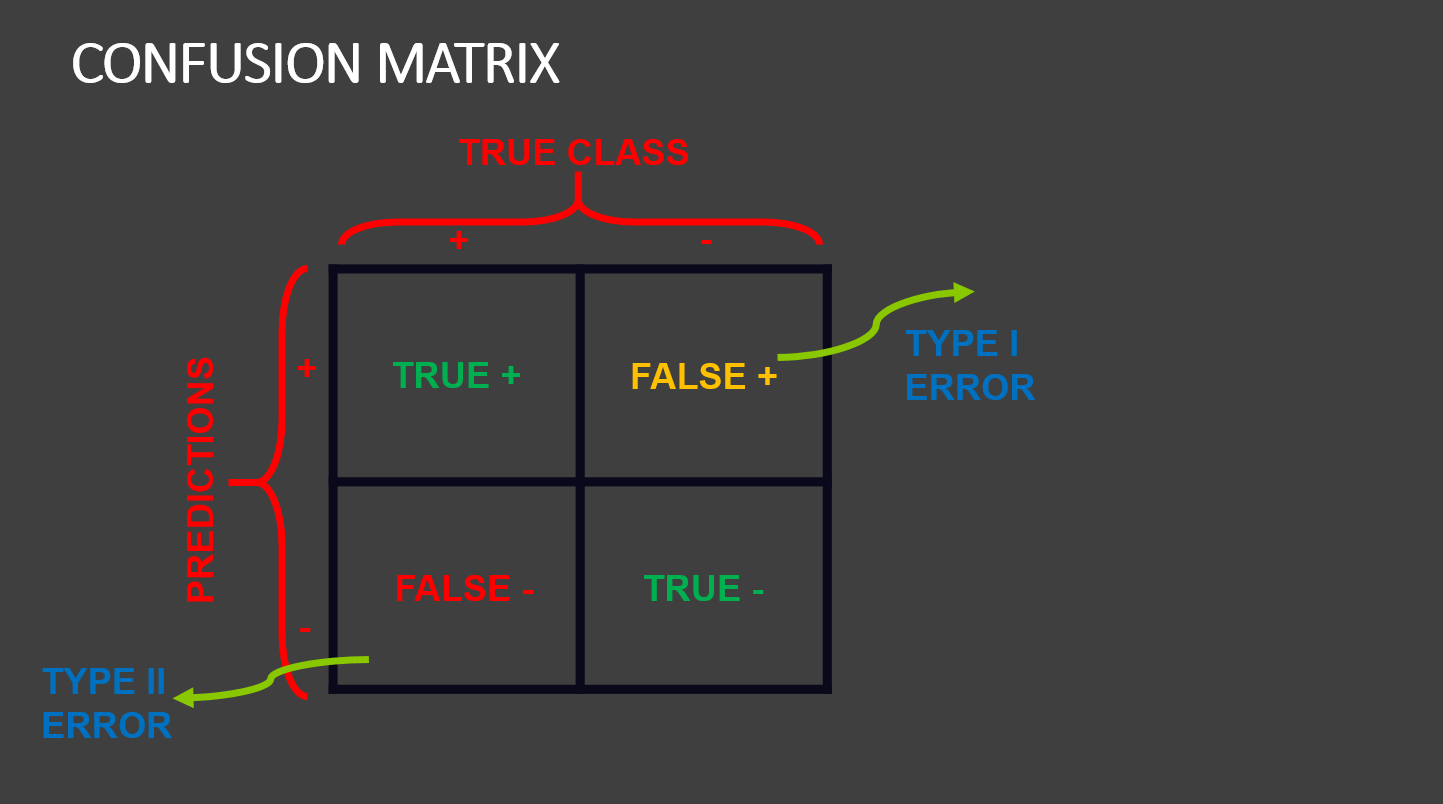

<Axes: >

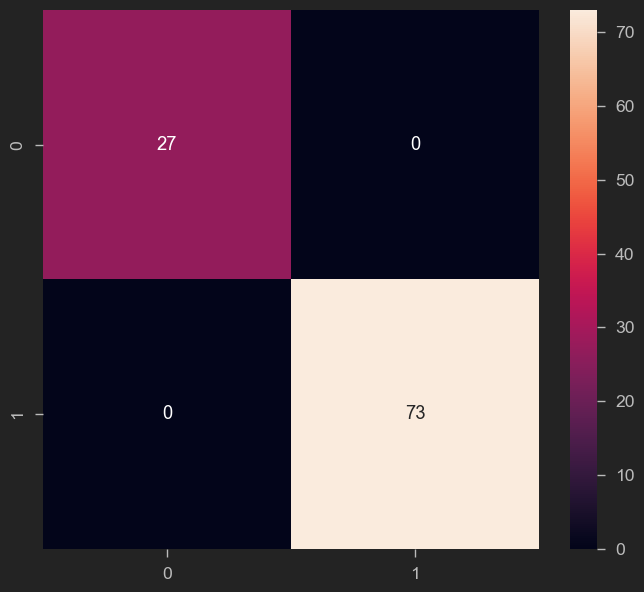

In [40]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

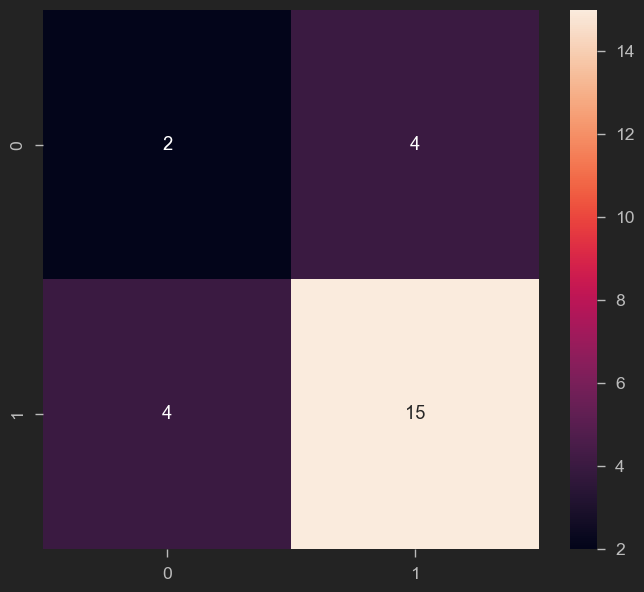

In [41]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [42]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         6
           1       0.79      0.79      0.79        19

    accuracy                           0.68        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.68      0.68      0.68        25

